In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [ ]:
df = pd.read_csv('SMA_data.csv')

In [ ]:
print("First few rows of the DataFrame:")
print(df.head())


First few rows of the DataFrame:
                     Datetime          SMA
0  2018-01-01 04:34:10.320672  6864.691463
1  2018-01-01 12:37:36.596064  6864.689664
2  2018-01-01 20:31:55.898112  6864.688585
3  2018-01-02 05:42:49.014720  6864.684927
4  2018-01-02 12:13:01.263360  6864.682858


In [ ]:
df

,Datetime,SMA
0,2018-01-01 04:34:10.320672,6864.691463
1,2018-01-01 12:37:36.596064,6864.689664
2,2018-01-01 20:31:55.898112,6864.688585
3,2018-01-02 05:42:49.014720,6864.684927
4,2018-01-02 12:13:01.263360,6864.682858
...,...,...
2286,2019-12-30 03:03:24.992640,6872.930137
2287,2019-12-30 11:05:46.768704,6872.928514
2288,2019-12-30 19:01:25.464576,6872.927281
2289,2019-12-31 10:44:01.110912,6872.923732


In [ ]:
print("Columns in DataFrame:", df.columns)
print("Data types:")
print(df.dtypes)

Columns in DataFrame: Index(['Datetime', 'SMA'], dtype='object')
Data types:
Datetime     object
SMA         float64
dtype: object


In [ ]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Datetime    0
SMA         0
dtype: int64


In [ ]:
df['SMA'] = df['SMA'].fillna(df['SMA'].mean())
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [ ]:
time = df['Datetime']
sma = df['SMA']

In [ ]:
scaler = StandardScaler()
sma_scaled = scaler.fit_transform(sma.values.reshape(-1, 1))

In [ ]:
features = sma_scaled

model = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination as needed
model.fit(features)
df['Anomaly'] = model.predict(features)

In [ ]:
print("Number of detected anomalies:", (df['Anomaly'] == -1).sum())
print("Anomalies DataFrame:")
print(df[df['Anomaly'] == -1].head())



Number of detected anomalies: 22
Anomalies DataFrame:
                      Datetime          SMA  Anomaly
386 2018-05-05 05:00:10.439424  6864.810374       -1
387 2018-05-06 12:41:49.412832  6864.808904       -1
388 2018-05-07 17:07:58.609056  6864.796192       -1
389 2018-05-07 21:43:26.044320  6864.795562       -1
872 2018-10-11 19:59:53.915424  6864.824196       -1


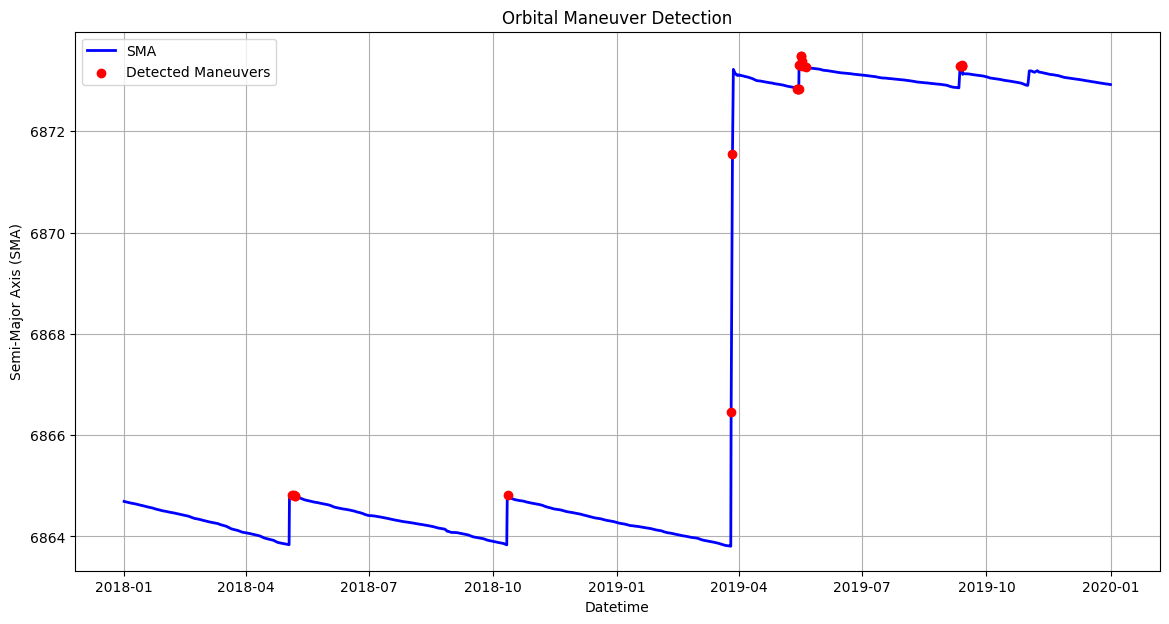

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(time, sma, label='SMA', color='blue', linewidth=2)
anomalies = df[df['Anomaly'] == -1]
plt.scatter(anomalies['Datetime'], anomalies['SMA'], color='red', label='Detected Maneuvers', zorder=5)

plt.xlabel('Datetime')
plt.ylabel('Semi-Major Axis (SMA)')
plt.title('Orbital Maneuver Detection')
plt.legend()
plt.grid(True)


In [1]:
from google.colab import files
uploaded = files.upload()


Saving SMA_data.csv to SMA_data.csv
